In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import re
from shapely.geometry import Polygon
import folium
import shapely.wkt
from shapely.wkt import loads
from shapely.geometry import Point, Polygon
import math

#### Load back DataFrames from part 1

In [2]:
grid_df = pd.read_csv('grid_df.csv')
incident_df = pd.read_csv('incident_df.csv')
speed_df = pd.read_csv('speed_df.csv')
volume_df = pd.read_csv('volume_df.csv')
# cast geometry column back to GeoDataFrame
grid_df['geometry'] = grid_df['geometry'].apply(shapely.wkt.loads)
grid_gdf = gpd.GeoDataFrame(grid_df, geometry = 'geometry')

speed_df['multiline'] = speed_df['multiline'].apply(shapely.wkt.loads)
speed_gdf = gpd.GeoDataFrame(speed_df, geometry = 'multiline', crs='epsg:4326')

# volume_df['multilinestring'] = volume_df['multilinestring'].apply(shapely.wkt.loads)
# volume_gdf = gpd.GeoDataFrame(volume_df, geometry = 'multilinestring', crs='epsg:4326')

## 3. Correlation Analysis between features and Traffic Accidents
### 3.1 Daily Temperature and Visibility Influence on Traffic Accident
The histogram of Accident counts vs Temperature shows no relations between accident counts and temperature. Similarly, Accident counts vs Visibility scatter plot also indicates no relation between those two parameters.

However, by observing the distribution pattern, account count peaked at temperature range (-5, 0), which may indicating that when road just start to freeze, slippery road condition will create more tranffic accidents than any other temperature range.

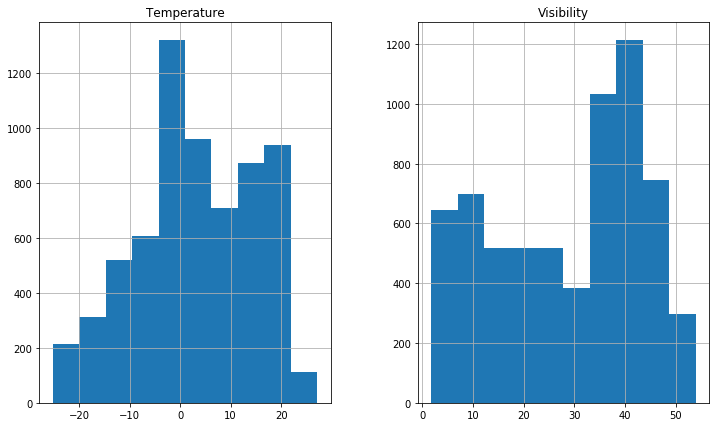

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(12,7))
# sns.scatterplot(x="Temperature", y="Accidents", ax=ax[0], data=incident_df)
# sns.scatterplot(x="Visibility", y="Accidents", ax=ax[1], data=incident_df)
incident_df.hist("Temperature", ax=ax[0])
incident_df.hist("Visibility", ax=ax[1])
plt.show()

### 3.2 Other Features Influence on Traffic Accident
#### 3.2.1 Correlation between Speed Limit and Traffic Accident
The linear regression plot of Accident counts vs Speed Limit shows a somewhat positive correlation between those two variables. However, most of the accidents can be seen within the speed limit range 60-80, which may indicates Expressways and Freeways within the city.

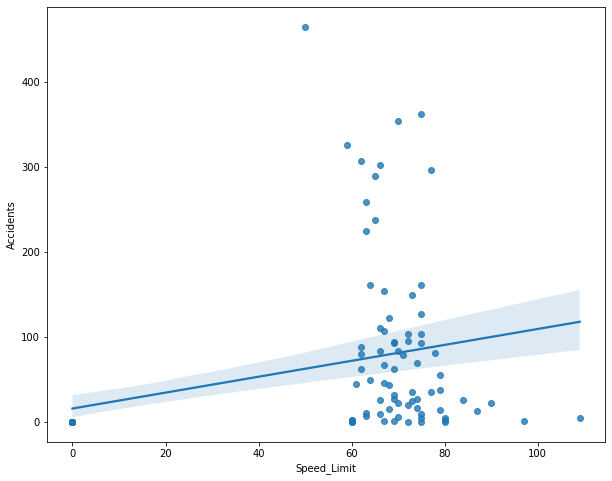

In [4]:
fig,ax=plt.subplots(figsize=(10,8))
sns.regplot(x='Speed_Limit',y='Accidents', ax=ax, data=grid_df, order=1)

#### 3.2.2 Correlation between Traffic Volume and Traffic Accident
The linear regression plot of Accidents Counts vs Traffic Volume indicates a positive correlation between them. This pattern is within anticipation statistically, as locations with higher traffic volume has the larger sample pool so are prone to have more traffic accidents.

The quantified correlation with be studied at the end of this chapter.

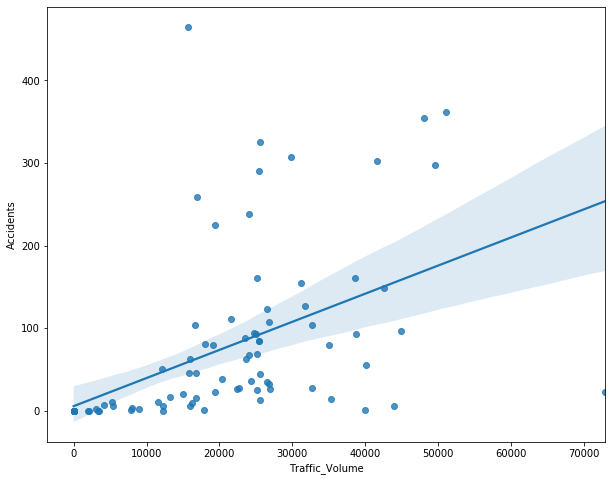

In [5]:
fig,ax=plt.subplots(figsize=(10,8))
sns.regplot(x='Traffic_Volume',y='Accidents', ax=ax, data=grid_df, order=1) # pointplot x vs y

#### 3.2.3 Correlation between Traffic Camera Counts and Traffic Accident
The regression plot of Traffic Accident counts vs Traffic Camera counts indicates a positive correlation between them. This effect may also because of the traffic volume, since the Traffic Cameras count vs Traffic Volume plot indicates a positive correlation between them.

The quantified correlation with be studied at the end of this chapter.

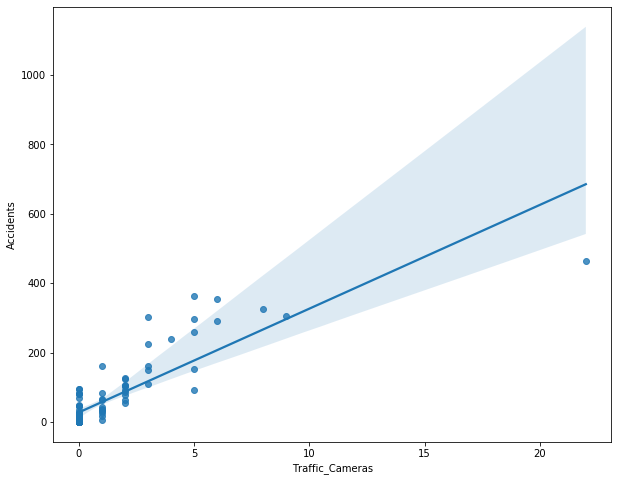

In [6]:
fig,ax=plt.subplots(figsize=(10,8))
sns.regplot(x="Traffic_Cameras", y="Accidents", ax=ax, data=grid_df)
plt.show()

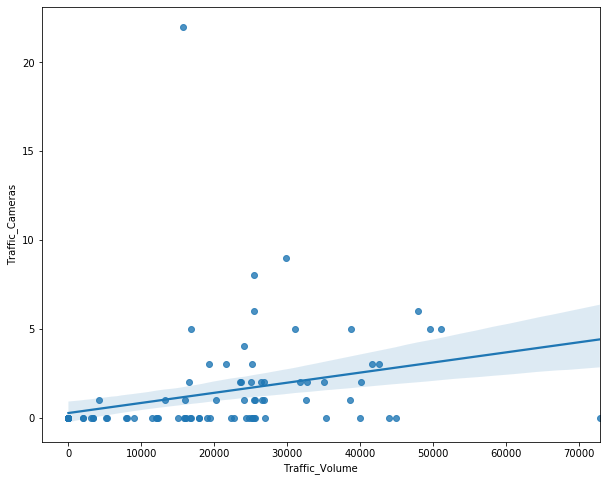

In [7]:
fig,ax=plt.subplots(figsize=(10,8))
sns.regplot(x="Traffic_Volume", y="Traffic_Cameras", ax=ax, data=grid_df)
plt.show()

#### 3.2.4 Correlation between Traffic Signal Counts and Traffic Accident
The regression plot of Traffic Accident counts vs Traffic Signal counts indicates a positive correlation between them. Like Traffic Cameras, this correlation may also because of the traffic volume, since the Traffic Signal count vs Traffic Volume plot indicates a positive correlation between them.

The quantified correlation with be studied at the end of this chapter.

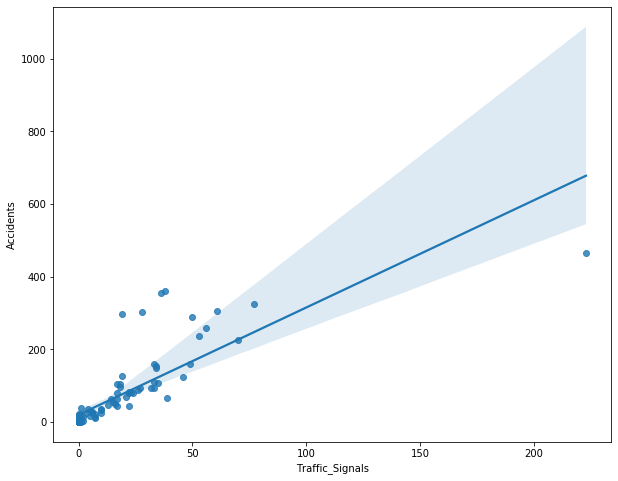

In [8]:
fig,ax=plt.subplots(figsize=(10,8))
sns.regplot(x="Traffic_Signals", y="Accidents", ax=ax, data=grid_df)
plt.show()

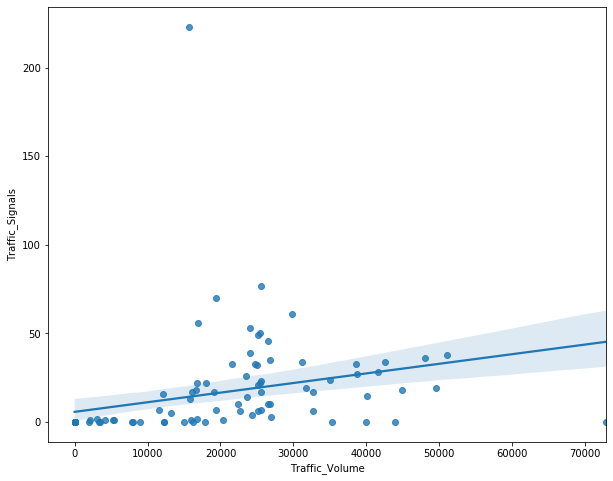

In [9]:
fig,ax=plt.subplots(figsize=(10,8))
sns.regplot(x="Traffic_Volume", y="Traffic_Signals", ax=ax, data=grid_df)
plt.show()

#### 3.2.5 Correlation between Traffic Sign Counts and Traffic Accident

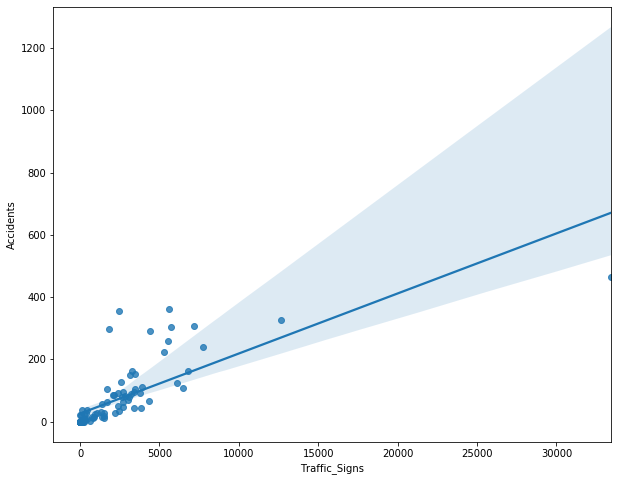

In [10]:
fig,ax=plt.subplots(figsize=(10,8))
sns.regplot(x="Traffic_Signs", y="Accidents", ax=ax, data=grid_df)
plt.show()

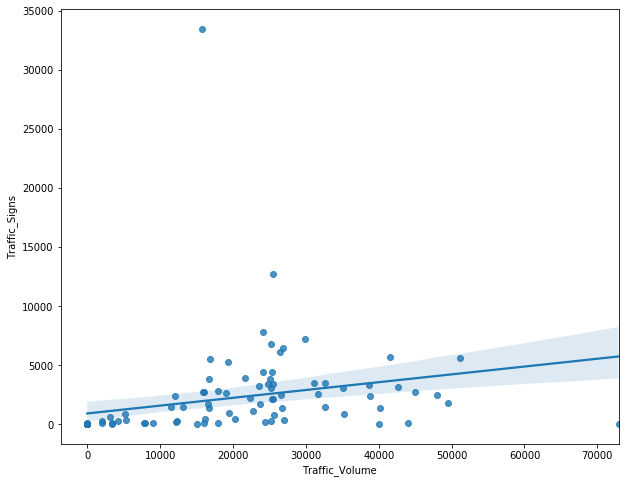

In [11]:
fig,ax=plt.subplots(figsize=(10,8))
sns.regplot(x="Traffic_Volume", y="Traffic_Signs", ax=ax, data=grid_df)
plt.show()

### 3.3 Quantitative Study of Factors Contribute to Traffic Accidents
Three quantitative correlation study(Pearson, Kendall, Spearman) have been performed in this section.

In all three studies, we are observing positive correlations between any or the features and accident counts. Amoung those, Traffic Sign counts and Traffic Signal counts are showing the strongest correlation to accidents.

#### 3.3.1 Pearson Correlation Study

In [12]:
parameters=['Accidents', 'Speed_Limit','Traffic_Volume', 'Traffic_Cameras', 'Traffic_Signals', 'Traffic_Signs']
grid_df[parameters].corr(method='pearson')

Accidents  Speed_Limit  Traffic_Volume  Traffic_Cameras  \
Accidents         1.000000     0.299831        0.528462         0.846082   
Speed_Limit       0.299831     1.000000        0.707985         0.168168   
Traffic_Volume    0.528462     0.707985        1.000000         0.311684   
Traffic_Cameras   0.846082     0.168168        0.311684         1.000000   
Traffic_Signals   0.818475     0.213830        0.302962         0.919970   
Traffic_Signs     0.757298     0.196862        0.261465         0.900012   

                 Traffic_Signals  Traffic_Signs  
Accidents               0.818475       0.757298  
Speed_Limit             0.213830       0.196862  
Traffic_Volume          0.302962       0.261465  
Traffic_Cameras         0.919970       0.900012  
Traffic_Signals         1.000000       0.972463  
Traffic_Signs           0.972463       1.000000

#### 3.3.2 Kendall Correlation Study

In [13]:
grid_df[parameters].corr(method='kendall')

Accidents  Speed_Limit  Traffic_Volume  Traffic_Cameras  \
Accidents         1.000000     0.282082        0.633239         0.701243   
Speed_Limit       0.282082     1.000000        0.555923         0.138387   
Traffic_Volume    0.633239     0.555923        1.000000         0.473617   
Traffic_Cameras   0.701243     0.138387        0.473617         1.000000   
Traffic_Signals   0.835438     0.169990        0.528490         0.695502   
Traffic_Signs     0.788238     0.201583        0.537230         0.611603   

                 Traffic_Signals  Traffic_Signs  
Accidents               0.835438       0.788238  
Speed_Limit             0.169990       0.201583  
Traffic_Volume          0.528490       0.537230  
Traffic_Cameras         0.695502       0.611603  
Traffic_Signals         1.000000       0.825797  
Traffic_Signs           0.825797       1.000000

#### 3.3.3 Spearman Correlation Study

In [14]:
grid_df[parameters].corr(method='spearman')

Accidents  Speed_Limit  Traffic_Volume  Traffic_Cameras  \
Accidents         1.000000     0.439067        0.803756         0.800618   
Speed_Limit       0.439067     1.000000        0.712159         0.193739   
Traffic_Volume    0.803756     0.712159        1.000000         0.590118   
Traffic_Cameras   0.800618     0.193739        0.590118         1.000000   
Traffic_Signals   0.940578     0.277248        0.679468         0.792520   
Traffic_Signs     0.929010     0.360214        0.714335         0.743034   

                 Traffic_Signals  Traffic_Signs  
Accidents               0.940578       0.929010  
Speed_Limit             0.277248       0.360214  
Traffic_Volume          0.679468       0.714335  
Traffic_Cameras         0.792520       0.743034  
Traffic_Signals         1.000000       0.943018  
Traffic_Signs           0.943018       1.000000

#### 3.3.4 Weather conditions
As we are not seeing any correlations between weather conditions and accident counts, it may be helpful to confirm this conclusion by using quantitative tools as well.

As expected, all results from three methods are showing very weak correlations between weather conditions and traffic accident counts. However, on a sidenote, we can observe a somewhat positive correlation between temperature and visibility, which is also true by common sense.

In [15]:
parameters=['Accidents', 'Temperature', 'Visibility']
incident_df[parameters].corr(method='pearson')

Accidents  Temperature  Visibility
Accidents     1.000000     0.044856    0.037522
Temperature   0.044856     1.000000    0.229565
Visibility    0.037522     0.229565    1.000000

In [16]:
incident_df[parameters].corr(method='kendall')

Accidents  Temperature  Visibility
Accidents     1.000000     0.028576    0.024483
Temperature   0.028576     1.000000    0.157612
Visibility    0.024483     0.157612    1.000000

In [17]:
incident_df[parameters].corr(method='spearman')

Accidents  Temperature  Visibility
Accidents     1.000000     0.042133    0.036063
Temperature   0.042133     1.000000    0.230376
Visibility    0.036063     0.230376    1.000000

## 4. Visualization

### 4.1 Visualize the speed limit according to the roads. (5 Marks)

In [18]:
smap = folium.Map(location=[51.03011, -114.08529], zoom_start = 10)

style20 = {'fillColor': '#FAF9DF', 'color': '#FAF9DF'}
speed20_df = speed_gdf[(speed_gdf['SPEED']>=20) & (speed_gdf['SPEED']<35)]
folium.GeoJson(speed20_df['multiline'], style_function=lambda x:style20).add_to(smap)

style30 = {'fillColor': '#FAF8B9', 'color': '#FAF8B9'}
speed30_df = speed_gdf[(speed_gdf['SPEED']>=30) & (speed_gdf['SPEED']<35)]
folium.GeoJson(speed30_df['multiline'], style_function=lambda x:style30).add_to(smap)

style35 = {'fillColor': '#F7F265', 'color': '#F7F265'}
speed35_df = speed_gdf[(speed_gdf['SPEED']>=35) & (speed_gdf['SPEED']<40)]
folium.GeoJson(speed35_df['multiline'], style_function=lambda x:style35).add_to(smap)

style40 = {'fillColor': '#E7E032', 'color': '#E7E032'}
speed40_df = speed_gdf[(speed_gdf['SPEED']>=40) & (speed_gdf['SPEED']<45)]
folium.GeoJson(speed40_df['multiline'], style_function=lambda x:style40).add_to(smap)

style45 = {'fillColor': '#E7CF3A', 'color': '#E7CF3A'}
speed45_df = speed_gdf[(speed_gdf['SPEED']>=45) & (speed_gdf['SPEED']<60)]
folium.GeoJson(speed45_df['multiline'], style_function=lambda x:style45).add_to(smap)

style60 = {'fillColor': '#D6A40A', 'color': '#D6A40A'}
speed60_df = speed_gdf[(speed_gdf['SPEED']>=60) & (speed_gdf['SPEED']<70)]
folium.GeoJson(speed60_df['multiline'], style_function=lambda x:style60).add_to(smap)

style70 = {'fillColor': '#E0A536', 'color': '#E0A536'}
speed70_df = speed_gdf[(speed_gdf['SPEED']>=70) & (speed_gdf['SPEED']<80)]
folium.GeoJson(speed70_df['multiline'], style_function=lambda x:style70).add_to(smap)

style80 = {'fillColor': '#E17515', 'color': '#E17515'}
speed80_df = speed_gdf[(speed_gdf['SPEED']>=80) & (speed_gdf['SPEED']<90)]
folium.GeoJson(speed80_df['multiline'], style_function=lambda x:style80).add_to(smap)

style90 = {'fillColor': '#E14D15', 'color': '#E14D15'}
speed90_df = speed_gdf[(speed_gdf['SPEED']>=90) & (speed_gdf['SPEED']<100)]
folium.GeoJson(speed90_df['multiline'], style_function=lambda x:style90).add_to(smap)

style100 = {'fillColor': '#AA370C', 'color': '#AA370C'}
speed100_df = speed_gdf[(speed_gdf['SPEED']>=100) & (speed_gdf['SPEED']<110)]
folium.GeoJson(speed100_df['multiline'], style_function=lambda x:style100).add_to(smap)

style110 = {'fillColor': '#7B1C0B', 'color': '#7B1C0B'}
speed110_df = speed_gdf[(speed_gdf['SPEED']>=110)]
folium.GeoJson(speed110_df['multiline'], style_function=lambda x:style110).add_to(smap)


In [19]:
# add legend info on to map and display
from branca.element import Template, MacroElement

template = """
{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>jQuery UI Draggable - Default functionality</title>
  <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">

  <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
  <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
  
  <script>
  $( function() {
    $( "#maplegend" ).draggable({
                    start: function (event, ui) {
                        $(this).css({
                            right: "auto",
                            top: "auto",
                            bottom: "auto"
                        });
                    }
                });
});

  </script>
</head>
<body>

 
<div id='maplegend' class='maplegend' 
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0.8);
     border-radius:6px; padding: 10px; font-size:14px; right: 20px; bottom: 20px;'>
     
<div class='legend-title'>Legend</div>
<div class='legend-scale'>
  <ul class='legend-labels'>
    <li><span style='background:#FAF9DF;opacity:0.7;'></span>20</li>
    <li><span style='background:#FAF8B9;opacity:0.7;'></span>30</li>
    <li><span style='background:#F7F265;opacity:0.7;'></span>35</li>
    <li><span style='background:#E7E032;opacity:0.7;'></span>40</li>
    <li><span style='background:#E7CF3A;opacity:0.7;'></span>45</li>
    <li><span style='background:#D6A40A;opacity:0.7;'></span>60</li>
    <li><span style='background:#E0A536;opacity:0.7;'></span>70</li>
    <li><span style='background:#E17515;opacity:0.7;'></span>80</li>
    <li><span style='background:#E14D15;opacity:0.7;'></span>90</li>
    <li><span style='background:#AA370C;opacity:0.7;'></span>100</li>  
    <li><span style='background:#7B1C0B;opacity:0.7;'></span>>110</li>
  </ul>
</div>
</div>
 
</body>
</html>

<style type='text/css'>
  .maplegend .legend-title {
    text-align: left;
    margin-bottom: 5px;
    font-weight: bold;
    font-size: 90%;
    }
  .maplegend .legend-scale ul {
    margin: 0;
    margin-bottom: 5px;
    padding: 0;
    float: left;
    list-style: none;
    }
  .maplegend .legend-scale ul li {
    font-size: 80%;
    list-style: none;
    margin-left: 0;
    line-height: 18px;
    margin-bottom: 2px;
    }
  .maplegend ul.legend-labels li span {
    display: block;
    float: left;
    height: 16px;
    width: 30px;
    margin-right: 5px;
    margin-left: 0;
    border: 1px solid #999;
    }
  .maplegend .legend-source {
    font-size: 80%;
    color: #777;
    clear: both;
    }
  .maplegend a {
    color: #777;
    }
</style>
{% endmacro %}"""

macro = MacroElement()
macro._template = Template(template)

smap.get_root().add_child(macro)

smap

### 4.2 Show traffic heatmap of 2018. (5 Marks)

In [20]:
volume_points_df = pd.read_csv('volume_points_df.csv')

In [21]:
# create heat map  --hmap

In [22]:
from folium import FeatureGroup, LayerControl, Map, Marker
from folium.plugins import HeatMap
hmap = folium.Map(location=[51.03011, -114.08529], zoom_start = 12,tiles='cartodbpositron')
hm_wide = HeatMap(list(zip(volume_points_df.latitude.values, volume_points_df.longitude.values)),
                     min_opacity=5.1,
                     radius=8, 
                     blur=10,
                     max_zoom=12
                 )
hmap.add_child(hm_wide)